In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Deck and Hand

In [44]:
class Deck:
    def __init__(self):
        '''
        Initialize poker deck
        First index i: rank/number
        Second index j: suite
        '''
        self.deck = np.array([[i,j] for i in range(13) for j in range(4)])
        
    def draw(self, total):
        '''
        draw total different cards from the deck
        '''
        random_numbers = np.random.choice(range(1, 52), size=total, replace=False)
        full_hand = self.deck[random_numbers]
        return full_hand
    
class Hand:
    def __init__(self, hand):
        '''
        initialize hand
        '''
        self.hand = np.array(hand)
    
    def is_flush(self):
        '''
        check if it's a flush
        '''
        suits = self.hand[:,1]
        suit_counts = Counter(suits)
        for count in suit_counts.values():
            if count >=5:
                return True
        return False
    
    def is_straight(self):
        '''
        Check if the hand contains a straight (5 consecutive ranks).
        Ace is only high
        '''
        # Extract the ranks of all cards (assuming the first element is the rank)
        ranks = [card[0] for card in self.hand]

        # Remove duplicates and sort the ranks
        unique_ranks = sorted(set(ranks))

        # Check if there are at least 5 unique ranks
        for i in range(len(unique_ranks) - 4):
            # Check if these 5 consecutive ranks form a straight
            if unique_ranks[i + 4] - unique_ranks[i] == 4:
                return True

        return False
    
    def has_three_of_a_kind(self):
        '''
        Check if the hand contains Three of a Kind (3 cards of the same rank).
        '''
        # Extract the ranks of all cards (assuming the first element is the rank)
        ranks = [card[0] for card in self.hand]

        # Count the frequency of each rank using Counter
        rank_counts = Counter(ranks)

        # Check if any rank appears exactly 3 times
        for count in rank_counts.values():
            if count == 3:
                return True

        return False


# Testing purposes

In [66]:
deck = Deck()
hand = deck.draw(5)

In [67]:
test_hand = Hand(hand) 
print(test_hand.is_flush())
print(test_hand.is_straight())
print(test_hand.has_three_of_a_kind())

False
False
False


In [68]:
hand

array([[12,  0],
       [ 6,  0],
       [ 5,  0],
       [ 8,  2],
       [ 9,  0]])

# Monte Carlo

In [63]:
class MC:
    def __init__(self, nsamples, max_cards):
        self.deck = Deck()
        self.nsamples = nsamples
        self.max_cards = max_cards

    def run_sim(self):
        self.num_flush = np.zeros(self.max_cards)
        self.num_straight = np.zeros(self.max_cards)
        self.num_three_kind = np.zeros(self.max_cards)

        for num_cards in range(self.max_cards):
            for i in range(self.nsamples):
                hand = Hand(deck.draw(num_cards))
                self.num_flush[num_cards] += hand.is_flush()
                self.num_straight[num_cards]    += hand.is_straight()
                self.num_three_kind[num_cards] += hand.has_three_of_a_kind()
                
    def plot_all(self):
        plt.scatter(range(self.max_cards), self.num_straight / self.nsamples, label = "straight")
        plt.scatter(range(self.max_cards), self.num_flush / self.nsamples, label = "flush")
        plt.scatter(range(self.max_cards), self.num_three_kind / self.nsamples, label = "three kind")
        plt.xlabel('Total cards')
        plt.ylabel('Probability')
        plt.legend()

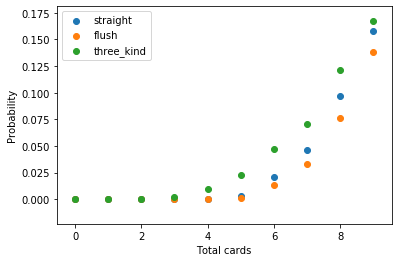

In [69]:
monte_carlo = MC(nsamples = 2000, max_cards = 10)
monte_carlo.run_sim()
monte_carlo.plot_all()

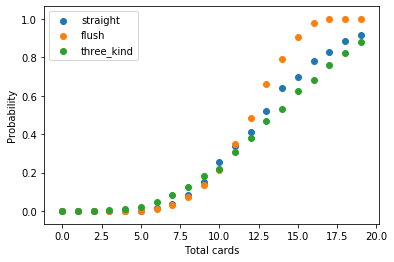

In [70]:
monte_carlo = MC(nsamples = 2000, max_cards = 20)
monte_carlo.run_sim()
monte_carlo.plot_all()